# **ABOUT DATASET :**

id: unique id for a news article
title: the title of a news article
author: author of the news article
text: the text of the article; could be incomplete
label: a label that marks the article as potentially unreliable

1: Fake News
0: True News




In [111]:
import numpy as np
import pandas as pd 
import re
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score




import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [112]:
# print stopwaords in english
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# **Data Collection & per-processing**

In [113]:
fakenews_dataset = pd.read_csv('/content/Kaggel_train.csv')

In [4]:
fakenews_dataset.shape

(20800, 5)

In [5]:
fakenews_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [114]:
fakenews_dataset.std()

<ipython-input-114-c519ab529688>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  fakenews_dataset.std()


id       6004.587135
label       0.500012
dtype: float64

In [115]:
fakenews_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [116]:
fakenews_dataset = fakenews_dataset.fillna('')

In [117]:
fakenews_dataset['content'] = fakenews_dataset['author']+ ''+fakenews_dataset['title']

In [152]:
print(fakenews_dataset['content'])


0        Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1        Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...
2        Consortiumnews.comWhy the Truth Might Get You ...
3        Jessica Purkiss15 Civilians Killed In Single U...
4        Howard PortnoyIranian woman jailed for fiction...
                               ...                        
20795    Jerome HudsonRapper T.I.: Trump a ’Poster Chil...
20796    Benjamin HoffmanN.F.L. Playoffs: Schedule, Mat...
20797    Michael J. de la Merced and Rachel AbramsMacy’...
20798    Alex AnsaryNATO, Russia To Hold Parallel Exerc...
20799               David SwansonWhat Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [11]:
X = fakenews_dataset.drop(columns='label', axis = 1)
Y = fakenews_dataset['label']

In [153]:
print(X)
print(Y)

  (0, 34402)	0.17918739747269477
  (0, 33460)	0.2620405036866357
  (0, 33092)	0.34354025525372645
  (0, 28544)	0.22370120836039492
  (0, 19040)	0.35769014842767877
  (0, 18475)	0.24826788911182338
  (0, 16508)	0.20476648736259792
  (0, 16295)	0.1536111400920685
  (0, 10594)	0.23028973074454998
  (0, 8620)	0.24398932179297475
  (0, 8241)	0.2740085657861192
  (0, 7840)	0.2951614509491496
  (0, 6517)	0.20565002646673405
  (0, 5558)	0.3015240959717515
  (0, 1181)	0.26093253981852516
  (1, 35080)	0.3619575823267221
  (1, 22730)	0.19046856538729842
  (1, 14631)	0.23703745360274664
  (1, 11652)	0.5156618392052476
  (1, 7777)	0.313608220062674
  (1, 6219)	0.23118052033472167
  (1, 5116)	0.4508844821928066
  (1, 4420)	0.18290583060889654
  (1, 3621)	0.3493832273397924
  (2, 35465)	0.25674258355397445
  :	:
  (20797, 20409)	0.3114229497461508
  (20797, 17935)	0.21981444256219335
  (20797, 16233)	0.126331449970448
  (20797, 15082)	0.2922971928123606
  (20797, 7967)	0.20435849370299847
  (20797, 4

# **Stemming**

In [13]:
port_stem = PorterStemmer()

In [14]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [15]:
fakenews_dataset['content'] = fakenews_dataset['content'].apply(stemming)

In [118]:
print(fakenews_dataset['content'])

0        Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1        Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...
2        Consortiumnews.comWhy the Truth Might Get You ...
3        Jessica Purkiss15 Civilians Killed In Single U...
4        Howard PortnoyIranian woman jailed for fiction...
                               ...                        
20795    Jerome HudsonRapper T.I.: Trump a ’Poster Chil...
20796    Benjamin HoffmanN.F.L. Playoffs: Schedule, Mat...
20797    Michael J. de la Merced and Rachel AbramsMacy’...
20798    Alex AnsaryNATO, Russia To Hold Parallel Exerc...
20799               David SwansonWhat Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


# **Separating & Labeling**

In [119]:
X = fakenews_dataset['content'].values
Y = fakenews_dataset['label'].values

In [120]:
print(X)

['Darrell LucusHouse Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'
 'Daniel J. FlynnFLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'
 'Consortiumnews.comWhy the Truth Might Get You Fired' ...
 'Michael J. de la Merced and Rachel AbramsMacy’s Is Said to Receive Takeover Approach by Hudson’s Bay - The New York Times'
 'Alex AnsaryNATO, Russia To Hold Parallel Exercises In Balkans'
 'David SwansonWhat Keeps the F-35 Alive']


In [121]:
print(Y)

[1 0 1 ... 0 1 1]


In [122]:
Y.shape

(20800,)

# **TfidfVectorizer**

In [123]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
print(X)

# **Splitting the data into Test and Train**

In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

# **Accuracy Score**

**Logistic Regression**



In [125]:
model_lr = LogisticRegression()

In [126]:
model_lr.fit(X_train, Y_train)

LogisticRegression()

In [127]:
# accuracy score on the training data
X_train_prediction_lr = model_lr.predict(X_train)
training_data_accuracy_lr = accuracy_score(X_train_prediction_lr, Y_train)
print('Accuracy score of the training data : ',training_data_accuracy_lr)
# accuracy score on the test data
X_test_prediction_lr = model_lr.predict(X_test)
test_data_accuracy_lr = accuracy_score(X_test_prediction_lr, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy_lr)

Accuracy score of the training data :  0.9720552884615384
Accuracy score of the test data :  0.9548076923076924


**Decision Tree Classifier**

In [128]:
from sklearn.tree import DecisionTreeClassifier

In [129]:
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [130]:
# accuracy score on the training data
X_train_prediction_dtc = model_dtc.predict(X_train)
training_data_accuracy_dtc = accuracy_score(X_train_prediction_dtc, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy_dtc)
# accuracy score on the test data
X_test_prediction_dtc = model_dtc.predict(X_test)
test_data_accuracy_dtc = accuracy_score(X_test_prediction_dtc, Y_test)
print('Accuracy score of the test data : ',test_data_accuracy_dtc)

Accuracy score of the training data :  1.0
Accuracy score of the test data :  0.9757211538461539


**Gradient Boosting**


In [131]:
from sklearn.ensemble import GradientBoostingClassifier


In [136]:
model_gbc = GradientBoostingClassifier(random_state=0)
model_gbc.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=0)

In [137]:
# accuracy score on the training data
X_train_prediction_gbc = model_gbc.predict(X_train)
training_data_accuracy_gbc = accuracy_score(X_train_prediction_gbc, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy_gbc)
# accuracy score on the test data
X_test_prediction_gbc = model_gbc.predict(X_test)
test_data_accuracy_gbc = accuracy_score(X_test_prediction_gbc, Y_test)
print('Accuracy score of the test data : ',test_data_accuracy_gbc)

Accuracy score of the training data :  0.9591346153846154
Accuracy score of the test data :  0.95625


**Random Forest Classifier**

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [140]:
# accuracy score on the training data
X_train_prediction_rfc = model_rfc.predict(X_train)
training_data_accuracy_rfc = accuracy_score(X_train_prediction_rfc, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy_rfc)
# accuracy score on the test data
X_test_prediction_rfc = model_rfc.predict(X_test)
test_data_accuracy_rfc = accuracy_score(X_test_prediction_rfc, Y_test)
print('Accuracy score of the test data : ',test_data_accuracy_rfc)

Accuracy score of the training data :  1.0
Accuracy score of the test data :  0.9725961538461538


#**Cross Valadation**

**Logistic Regression**

In [141]:
cv_score_lr = cross_val_score(LogisticRegression(), X, Y, cv=5)

print(cv_score_lr)

mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)

mean_accuracy_lr = mean_accuracy_lr*100

mean_accuracy_lr = round(mean_accuracy_lr, 2)

print(mean_accuracy_lr)

[0.95240385 0.95072115 0.95552885 0.94807692 0.95120192]
95.16


**Decision Tree Classifier**

In [142]:
cv_score_drc = cross_val_score(DecisionTreeClassifier(), X, Y, cv=5)

print(cv_score_drc)

mean_accuracy_drc = sum(cv_score_drc)/len(cv_score_drc)

mean_accuracy_drc = mean_accuracy_drc*100

mean_accuracy_drc = round(mean_accuracy_drc, 2)

print(mean_accuracy_drc)

[0.98028846 0.98100962 0.98076923 0.98076923 0.97668269]
97.99


**Gradient Boosting Classifier**

In [143]:
cv_score_gbc = cross_val_score(GradientBoostingClassifier(), X, Y, cv=5)

print(cv_score_gbc)

mean_accuracy_gbc = sum(cv_score_gbc)/len(cv_score_gbc)

mean_accuracy_gbc = mean_accuracy_gbc*100

mean_accuracy_gbc = round(mean_accuracy_gbc, 2)

print(mean_accuracy_gbc)

[0.95336538 0.95600962 0.95480769 0.95120192 0.95096154]
95.33


**Random Forest Classifier**






In [144]:
cv_score_rfc = cross_val_score(RandomForestClassifier(), X, Y, cv=5)

print(cv_score_rfc)

mean_accuracy_rfc = sum(cv_score_rfc)/len(cv_score_rfc)

mean_accuracy_rfc = mean_accuracy_rfc*100

mean_accuracy_rfc = round(mean_accuracy_rfc, 2)

print(mean_accuracy_rfc)

[0.97331731 0.97211538 0.97115385 0.96875    0.97379808]
97.18


# **Confusion Matrix**


In [145]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns

**Logistic Regression**

The classification report for Logistic Regression: 
               precision    recall  f1-score   support

           0       0.99      0.87      0.92      2077
           1       0.88      0.99      0.93      2083

    accuracy                           0.93      4160
   macro avg       0.94      0.93      0.93      4160
weighted avg       0.94      0.93      0.93      4160



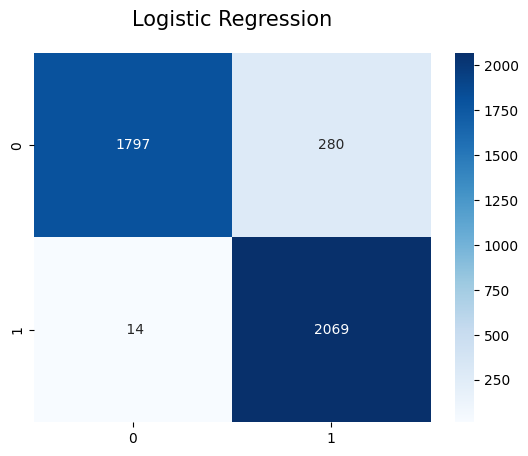

In [146]:
import matplotlib.pyplot as plt
lr = cross_val_predict(model_lr,X_test,Y_test,cv=5)

sns.heatmap(confusion_matrix(Y_test,lr),annot=True,fmt='3.0f',cmap="Blues")

plt.title('Logistic Regression', y=1.05, size=15)
from sklearn.metrics import classification_report
print('The classification report for Logistic Regression:','\n',classification_report(Y_test,lr))

**Decision Tree Classifier**

The classification report for Decision Tree Classifier: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      2077
           1       0.96      0.97      0.96      2083

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.96      0.96      0.96      4160



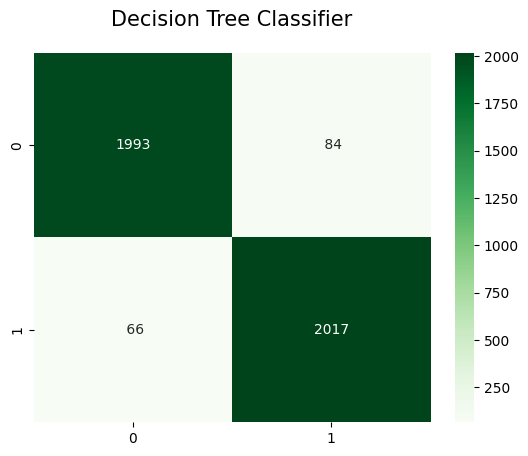

In [147]:
import matplotlib.pyplot as plt
dtc = cross_val_predict(model_dtc,X_test,Y_test,cv=5)

sns.heatmap(confusion_matrix(Y_test,dtc),annot=True,fmt='3.0f',cmap="Greens")

plt.title('Decision Tree Classifier', y=1.05, size=15)
from sklearn.metrics import classification_report
print('The classification report for Decision Tree Classifier:','\n',classification_report(Y_test,dtc))

**Gradient Boosting Classifier**

The classification report for Gradient Boosting Classifier: 
               precision    recall  f1-score   support

           0       0.99      0.90      0.94      2077
           1       0.91      0.99      0.95      2083

    accuracy                           0.95      4160
   macro avg       0.95      0.95      0.95      4160
weighted avg       0.95      0.95      0.95      4160



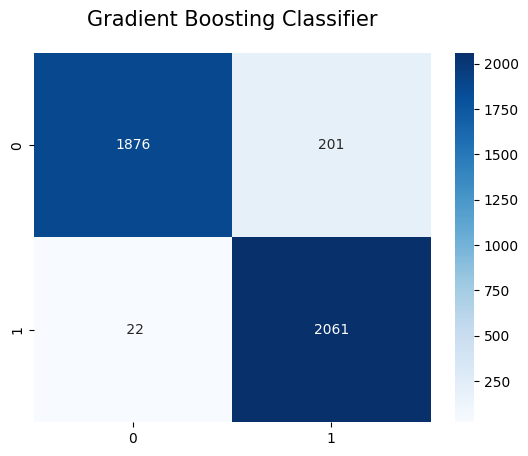

In [148]:
import matplotlib.pyplot as plt
gbc = cross_val_predict(model_gbc,X_test,Y_test,cv=5)

sns.heatmap(confusion_matrix(Y_test,gbc),annot=True,fmt='3.0f',cmap="Blues")

plt.title('Gradient Boosting Classifier', y=1.05, size=15)
from sklearn.metrics import classification_report
print('The classification report for Gradient Boosting Classifier:','\n',classification_report(Y_test,gbc))

**Random Forest Classifier**

The classification report for Random Forest Classifier: 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95      2077
           1       0.91      1.00      0.95      2083

    accuracy                           0.95      4160
   macro avg       0.95      0.95      0.95      4160
weighted avg       0.95      0.95      0.95      4160



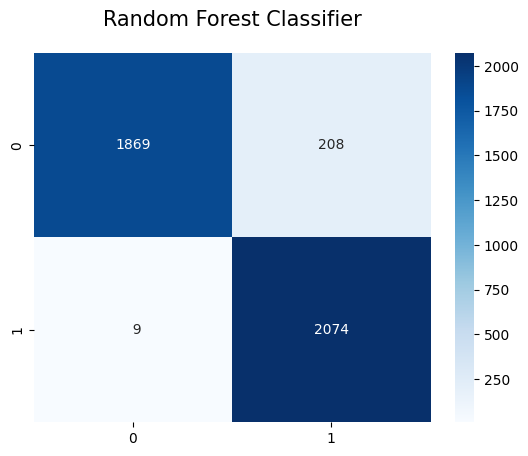

In [149]:
import matplotlib.pyplot as plt
rfc = cross_val_predict(model_rfc,X_test,Y_test,cv=5)

sns.heatmap(confusion_matrix(Y_test,rfc),annot=True,fmt='3.0f',cmap="Blues")

plt.title('Random Forest Classifier', y=1.05, size=15)
from sklearn.metrics import classification_report
print('The classification report for Random Forest Classifier:','\n',classification_report(Y_test,rfc))

# **Prediction Model**

In [150]:
X_new = X_test[3]

prediction = model_dtc.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [151]:
print(Y_test[3])

0
